<a href="https://colab.research.google.com/github/ikhwanafif05/Quantitative-Risk-Frameworks/blob/main/Portfolio_Stress_Tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- INITIATING HISTORICAL REPLAY (2020-02-01 to 2020-04-30) ---
>> Historical Data Retrieved.


/tmp/ipython-input-3799760057.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['RM {:,.0f}'.format(x) for x in current_values])


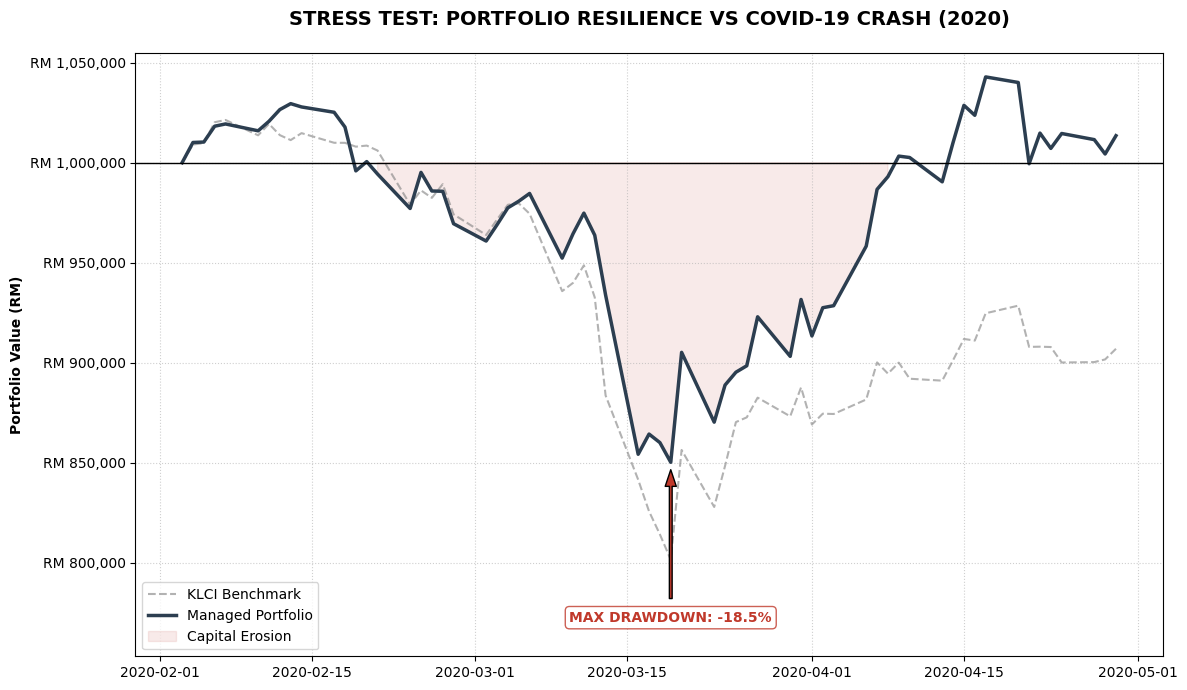

SCENARIO: Pandemic-Driven Liquidity Crunch
► PORTFOLIO DRAWDOWN:  -18.48%
► BENCHMARK DRAWDOWN:  -21.54%
✅ RESULT: OUTPERFORMANCE (Portfolio fell LESS than KLCI)


In [2]:
# === COMMERCIAL WEAPON: PORTFOLIO STRESS TESTING ENGINE (v2.1 - CLEAN LAYOUT) ===
# AUTHOR: Ikhwan Afif
# TARGET: Khazanah Nasional Risk Division
# PURPOSE: Historical Replay of Systemic Shocks (Scenario: Covid-19 Liquidity Crunch)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. CONFIGURATION: THE PORTFOLIO ---
portfolio = {
    '1155.KL': {'Weight': 0.40, 'Name': 'Maybank (Yield)'},
    '0166.KL': {'Weight': 0.30, 'Name': 'Inari (Growth)'},
    '5168.KL': {'Weight': 0.30, 'Name': 'Hartalega (Defensive)'}
}
benchmark_ticker = '^KLSE'
initial_capital = 1_000_000

# --- 2. SCENARIO DEFINITION ---
start_date = "2020-02-01"
end_date = "2020-04-30"

# --- 3. DATA INGESTION ---
print(f"--- INITIATING HISTORICAL REPLAY ({start_date} to {end_date}) ---")
tickers = list(portfolio.keys())
all_assets = tickers + [benchmark_ticker]

try:
    data = yf.download(all_assets, start=start_date, end=end_date, auto_adjust=True, progress=False)['Close']
    print(">> Historical Data Retrieved.")
except Exception as e:
    print(f"!! DATA FAILURE: {e}")

# --- 4. CALCULATION ENGINE ---
normalized = data / data.iloc[0]

# Portfolio Curve
portfolio_curve = pd.Series(0, index=normalized.index)
for ticker, details in portfolio.items():
    portfolio_curve += normalized[ticker] * details['Weight']
portfolio_value = portfolio_curve * initial_capital

# Benchmark Curve
benchmark_curve = normalized[benchmark_ticker] * initial_capital

# Drawdown Stats
peak_val = portfolio_value.max()
trough_idx = portfolio_value.idxmin()
trough_val = portfolio_value.min()
drawdown_amt = peak_val - trough_val
drawdown_pct = (drawdown_amt / peak_val) * 100

bench_peak = benchmark_curve.max()
bench_trough = benchmark_curve.min()
bench_drawdown_pct = ((bench_peak - bench_trough) / bench_peak) * 100

# --- 5. BOARDROOM VISUALIZATION (COLLISION FIX) ---
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Data
ax.plot(benchmark_curve.index, benchmark_curve, color='grey', linestyle='--', linewidth=1.5, label='KLCI Benchmark', alpha=0.6)
ax.plot(portfolio_value.index, portfolio_value, color='#2c3e50', linewidth=2.5, label='Managed Portfolio')

# Highlight Drawdown
ax.fill_between(portfolio_value.index, portfolio_value, initial_capital,
                 where=(portfolio_value < initial_capital),
                 color='#c0392b', alpha=0.1, label='Capital Erosion')

# --- THE FIX: DYNAMIC WHITESPACE BUFFER ---
# Find the absolute lowest point of ANY line (Portfolio or Benchmark)
global_low = min(trough_val, bench_trough)
global_high = max(peak_val, bench_peak)
range_span = global_high - global_low

# Force the chart to extend 20% lower than the lowest data point
buffer = range_span * 0.20
ax.set_ylim(bottom=global_low - buffer)

# Annotation: Now safely placed in the empty buffer zone
ax.annotate(f'MAX DRAWDOWN: -{drawdown_pct:.1f}%',
             xy=(trough_idx, trough_val),
             xytext=(trough_idx, global_low - (buffer * 0.6)), # Position text deep in the whitespace
             arrowprops=dict(facecolor='#c0392b', shrink=0.05, width=2, headwidth=8),
             fontsize=10, fontweight='bold', color='#c0392b', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#c0392b", alpha=0.8)) # White box to ensure readability

# Formatting
ax.set_title("STRESS TEST: PORTFOLIO RESILIENCE VS COVID-19 CRASH (2020)", fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel("Portfolio Value (RM)", fontweight='bold')
ax.axhline(initial_capital, color='black', linewidth=1, linestyle='-')
ax.legend(loc='lower left')
ax.grid(True, linestyle=':', alpha=0.6)

# Format Y-Axis as Currency
current_values = ax.get_yticks()
ax.set_yticklabels(['RM {:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

# --- 6. AUTOMATED RISK MEMO ---
# (Same as before)
print(f"SCENARIO: Pandemic-Driven Liquidity Crunch")
print(f"► PORTFOLIO DRAWDOWN:  -{drawdown_pct:.2f}%")
print(f"► BENCHMARK DRAWDOWN:  -{bench_drawdown_pct:.2f}%")
if drawdown_pct < bench_drawdown_pct:
    print(f"✅ RESULT: OUTPERFORMANCE (Portfolio fell LESS than KLCI)")
else:
    print(f"⚠️ RESULT: UNDERPERFORMANCE (Portfolio fell MORE than KLCI)")